# How is the President of the United States elected?
[Reference1](https://www.kaggle.com/datasets/unanimad/us-election-2020?datasetId=955555&sortBy=voteCount)  
[Reference2](https://www.kaggle.com/datasets/muonneutrino/us-census-demographic-data)

In [74]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## EDA

In [75]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [76]:
# from US Election 2020
df_pres = pd.read_csv('./president_county_candidate.csv')
df_gov = pd.read_csv('./governors_county_candidate.csv')

# from US Census 2017
df_census = pd.read_csv('./acs2017_county_data.csv')

# State Code 관련 부가자료
state_code = pd.read_html('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')[0]

In [77]:
df_pres.head()

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
2,Delaware,Kent County,Jo Jorgensen,LIB,1044,False
3,Delaware,Kent County,Howie Hawkins,GRN,420,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True


In [78]:
df_pres['candidate'].unique()

array(['Joe Biden', 'Donald Trump', 'Jo Jorgensen', 'Howie Hawkins',
       ' Write-ins', 'Gloria La Riva', 'Brock Pierce',
       'Rocky De La Fuente', 'Don Blankenship', 'Kanye West',
       'Brian Carroll', 'Ricki Sue King', 'Jade Simmons',
       'President Boddie', 'Bill Hammons', 'Tom Hoefling',
       'Alyson Kennedy', 'Jerome Segal', 'Phil Collins',
       ' None of these candidates', 'Sheila Samm Tittle', 'Dario Hunter',
       'Joe McHugh', 'Christopher LaFontaine', 'Keith McCormic',
       'Brooke Paige', 'Gary Swing', 'Richard Duncan', 'Blake Huber',
       'Kyle Kopitke', 'Zachary Scalf', 'Jesse Ventura', 'Connie Gammon',
       'John Richard Myers', 'Mark Charles', 'Princess Jacob-Fambro',
       'Joseph Kishore', 'Jordan Scott'], dtype=object)

In [79]:
df_pres['candidate'].value_counts()

Joe Biden                    4633
Donald Trump                 4633
Jo Jorgensen                 4633
 Write-ins                   3792
Howie Hawkins                2994
Rocky De La Fuente           1562
Don Blankenship              1317
Brock Pierce                 1124
Kanye West                   1082
Gloria La Riva               1028
Brian Carroll                 745
Alyson Kennedy                595
Phil Collins                  467
Kyle Kopitke                  310
Blake Huber                   310
Jerome Segal                  270
Gary Swing                    246
Zachary Scalf                 246
Richard Duncan                246
Christopher LaFontaine        246
Keith McCormic                246
Brooke Paige                  246
Bill Hammons                  149
Jade Simmons                  141
Dario Hunter                  100
Ricki Sue King                 99
Joe McHugh                     93
Connie Gammon                  75
John Richard Myers             75
Joseph Kishore

$\rightarrow \textbf{Write-ins:}\; \text{직접 와서 이름을 적은 횟수}$

In [80]:
df_pres.loc[df_pres['candidate'] == 'Kanye West']['total_votes'].sum()

66367

In [81]:
df_pres.loc[df_pres['candidate'] == 'Joe Biden']['total_votes'].sum()

82046434

In [82]:
df_gov.head()   

,state,county,candidate,party,votes,won
0,Delaware,Kent County,John Carney,DEM,44352,True
1,Delaware,Kent County,Julianne Murray,REP,39332,False
2,Delaware,Kent County,Kathy DeMatteis,IPD,1115,False
3,Delaware,Kent County,John Machurek,LIB,616,False
4,Delaware,New Castle County,John Carney,DEM,191678,True


In [83]:
df_census.head()

,CountyId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga County,55036,26899,28137,2.7,75.4,18.9,0.3,...,0.6,1.3,2.5,25.8,24112,74.1,20.2,5.6,0.1,5.2
1,1003,Alabama,Baldwin County,203360,99527,103833,4.4,83.1,9.5,0.8,...,0.8,1.1,5.6,27.0,89527,80.7,12.9,6.3,0.1,5.5
2,1005,Alabama,Barbour County,26201,13976,12225,4.2,45.7,47.8,0.2,...,2.2,1.7,1.3,23.4,8878,74.1,19.1,6.5,0.3,12.4
3,1007,Alabama,Bibb County,22580,12251,10329,2.4,74.6,22.0,0.4,...,0.3,1.7,1.5,30.0,8171,76.0,17.4,6.3,0.3,8.2
4,1009,Alabama,Blount County,57667,28490,29177,9.0,87.4,1.5,0.3,...,0.4,0.4,2.1,35.0,21380,83.9,11.9,4.0,0.1,4.9


In [84]:
df_census['County'].value_counts()

Washington County    30
Jefferson County     25
Franklin County      24
Jackson County       23
Lincoln County       23
                     ..
Nantucket County      1
Hampden County        1
Dukes County          1
Berkshire County      1
Yauco Municipio       1
Name: County, Length: 1955, dtype: int64

In [85]:
state_code.head()

,State Name/District,Postal Abbreviation,Postal Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [86]:
data1 = df_pres.loc[df_pres['party'].apply(lambda s: str(s) in ['DEM', 'REP'])]
table_pres = pd.pivot_table(data=data1, index=['state', 'county'], columns='party', values='total_votes')
table_pres.rename({'DEM':'Pres_DEM','REP':'Pres_REP'}, axis=1, inplace=True)
print(table_pres.isna().sum())
table_pres

party
Pres_DEM    0
Pres_REP    0
dtype: int64


party                      Pres_DEM  Pres_REP
state   county                               
Alabama Autauga County         7503     19838
        Baldwin County        24578     83544
        Barbour County         4816      5622
        Bibb County            1986      7525
        Blount County          2640     24711
...                             ...       ...
Wyoming Sweetwater County      3823     12229
        Teton County           9848      4341
        Uinta County           1591      7496
        Washakie County         651      3245
        Weston County           360      3107

[4633 rows x 2 columns]

In [88]:
data1.head(10)

,state,county,candidate,party,total_votes,won
0,Delaware,Kent County,Joe Biden,DEM,44552,True
1,Delaware,Kent County,Donald Trump,REP,41009,False
4,Delaware,New Castle County,Joe Biden,DEM,195034,True
5,Delaware,New Castle County,Donald Trump,REP,88364,False
8,Delaware,Sussex County,Donald Trump,REP,71230,True
9,Delaware,Sussex County,Joe Biden,DEM,56682,False
12,District of Columbia,District of Columbia,Joe Biden,DEM,39041,True
13,District of Columbia,District of Columbia,Donald Trump,REP,1725,False
19,District of Columbia,Ward 2,Joe Biden,DEM,29078,True
20,District of Columbia,Ward 2,Donald Trump,REP,2918,False


In [89]:
df_gov.head()

,state,county,candidate,party,votes,won
0,Delaware,Kent County,John Carney,DEM,44352,True
1,Delaware,Kent County,Julianne Murray,REP,39332,False
2,Delaware,Kent County,Kathy DeMatteis,IPD,1115,False
3,Delaware,Kent County,John Machurek,LIB,616,False
4,Delaware,New Castle County,John Carney,DEM,191678,True


In [90]:
data2 = df_gov.loc[df_gov['party'].apply(lambda s: str(s) in ['DEM', 'REP'])]
table_gov = pd.pivot_table(data=data2, index=['state', 'county'], columns='party', values='votes')
table_gov.rename({'DEM':'Gov_DEM','REP':'Gov_REP'}, axis=1, inplace=True)
print(table_gov.isna().sum())
table_gov

party
Gov_DEM    0
Gov_REP    0
dtype: int64


party                            Gov_DEM  Gov_REP
state         county                             
Delaware      Kent County          44352    39332
              New Castle County   191678    82545
              Sussex County        56873    68435
Indiana       Adams County          2143     9441
              Allen County         53895    98406
...                                  ...      ...
West Virginia Webster County         659     2552
              Wetzel County         1727     4559
              Wirt County            483     1947
              Wood County           9933    26232
              Wyoming County        1240     6941

[1025 rows x 2 columns]

In [91]:
df_census.rename({'State':'state','County':'county'}, axis=1, inplace=True)
df_census.drop('CountyId',axis=1, inplace=True)
df_census.set_index(['state','county'], inplace=True)
df_census

TotalPop    Men   Women  Hispanic  White  \
state       county                                                          
Alabama     Autauga County          55036  26899   28137       2.7   75.4   
            Baldwin County         203360  99527  103833       4.4   83.1   
            Barbour County          26201  13976   12225       4.2   45.7   
            Bibb County             22580  12251   10329       2.4   74.6   
            Blount County           57667  28490   29177       9.0   87.4   
...                                   ...    ...     ...       ...    ...   
Puerto Rico Vega Baja Municipio     54754  26269   28485      96.7    3.1   
            Vieques Municipio        8931   4351    4580      95.7    4.0   
            Villalba Municipio      23659  11510   12149      99.7    0.2   
            Yabucoa Municipio       35025  16984   18041      99.9    0.1   
            Yauco Municipio         37585  18052   19533      99.8    0.2   

                                 Black  Native  Asian  Pacific  \
state       county                                               
Alabama     Autauga County        18.9     0.3    0.9      0.0   
            Baldwin County         9.5     0.8    0.7      0.0   
            Barbour County        47.8     0.2    0.6      0.0   
            Bibb County           22.0     0.4    0.0      0.0   
            Blount County          1.5     0.3    0.1      0.0   
...                                ...     ...    ...      ...   
Puerto Rico Vega Baja Municipio    0.1     0.0    0.0      0.0   
            Vieques Municipio      0.0     0.0    0.0      0.0   
            Villalba Municipio     0.1     0.0    0.0      0.0   
            Yabucoa Municipio      0.0     0.0    0.0      0.0   
            Yauco Municipio        0.0     0.0    0.0      0.0   

                                 VotingAgeCitizen  ...  Walk  OtherTransp  \
state       county                                 ...                      
Alabama     Autauga County                  41016  ...   0.6          1.3   
            Baldwin County                 155376  ...   0.8          1.1   
            Barbour County                  20269  ...   2.2          1.7   
            Bibb County                     17662  ...   0.3          1.7   
            Blount County                   42513  ...   0.4          0.4   
...                                           ...  ...   ...          ...   
Puerto Rico Vega Baja Municipio             42838  ...   1.4          0.6   
            Vieques Municipio                7045  ...   5.0          0.0   
            Villalba Municipio              18053  ...   2.1          0.0   
            Yabucoa Municipio               27523  ...   1.4          1.8   
            Yauco Municipio                 29763  ...   1.7          0.1   

                                 WorkAtHome  MeanCommute  Employed  \
state       county                                                   
Alabama     Autauga County              2.5         25.8     24112   
            Baldwin County              5.6         27.0     89527   
            Barbour County              1.3         23.4      8878   
            Bibb County                 1.5         30.0      8171   
            Blount County               2.1         35.0     21380   
...                                     ...          ...       ...   
Puerto Rico Vega Baja Municipio         0.9         31.6     14234   
            Vieques Municipio           1.7         14.9      2927   
            Villalba Municipio          2.8         28.4      6873   
            Yabucoa Municipio           0.1         30.5      7878   
            Yauco Municipio             5.0         24.4      8995   

                                 PrivateWork  PublicWork  SelfEmployed  \
state       county                                                       
Alabama     Autauga County              74.1        20.2           5.6   
            Baldwin County           

In [92]:
df_census.columns

Index(['TotalPop', 'Men', 'Women', 'Hispanic', 'White', 'Black', 'Native',
       'Asian', 'Pacific', 'VotingAgeCitizen', 'Income', 'IncomeErr',
       'IncomePerCap', 'IncomePerCapErr', 'Poverty', 'ChildPoverty',
       'Professional', 'Service', 'Office', 'Construction', 'Production',
       'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp', 'WorkAtHome',
       'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork', 'SelfEmployed',
       'FamilyWork', 'Unemployment'],
      dtype='object')

In [93]:
# 불필요한 데이터 Drop
df_census.drop(['Income', 'IncomeErr', 'IncomePerCapErr'], axis=1, inplace=True)

In [94]:
# Multi-Colinearity를 피하기 위해 '전체인구','남자','여자' -> '남자비율'
df_census.drop(['Women'], axis=1, inplace=True)
df_census['Men'] /= df_census['TotalPop']
df_census['VotingAgeCitizen'] /= df_census['TotalPop']
df_census['Employed'] /= df_census['TotalPop']

In [95]:
df_census.head()

TotalPop       Men  Hispanic  White  Black  Native  \
state   county                                                               
Alabama Autauga County     55036  0.488753       2.7   75.4   18.9     0.3   
        Baldwin County    203360  0.489413       4.4   83.1    9.5     0.8   
        Barbour County     26201  0.533415       4.2   45.7   47.8     0.2   
        Bibb County        22580  0.542560       2.4   74.6   22.0     0.4   
        Blount County      57667  0.494043       9.0   87.4    1.5     0.3   

                        Asian  Pacific  VotingAgeCitizen  IncomePerCap  ...  \
state   county                                                          ...   
Alabama Autauga County    0.9      0.0          0.745258         27824  ...   
        Baldwin County    0.7      0.0          0.764044         29364  ...   
        Barbour County    0.6      0.0          0.773596         17561  ...   
        Bibb County       0.0      0.0          0.782197         20911  ...   
        Blount County     0.1      0.0          0.737215         22021  ...   

                        Walk  OtherTransp  WorkAtHome  MeanCommute  Employed  \
state   county                                                                 
Alabama Autauga County   0.6          1.3         2.5         25.8  0.438113   
        Baldwin County   0.8          1.1         5.6         27.0  0.440239   
        Barbour County   2.2          1.7         1.3         23.4  0.338842   
        Bibb County      0.3          1.7         1.5         30.0  0.361869   
        Blount County    0.4          0.4         2.1         35.0  0.370749   

                        PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
state   county                                                              
Alabama Autauga County         74.1        20.2           5.6         0.1   
        Baldwin County         80.7        12.9           6.3         0.1   
        Barbour County         74.1        19.1           6.5         0.3   
        Bibb County            76.0        17.4           6.3         0.3   
        Blount County          83.9        11.9           4.0         0.1   

                        Unemployment  
state   county                        
Alabama Autauga County           5.2  
        Baldwin County           5.5  
        Barbour County          12.4  
        Bibb County              8.2  
        Blount County            4.9  

[5 rows x 30 columns]

In [96]:
df = pd.concat([table_pres, table_gov, df_census], axis=1)
df

Pres_DEM  Pres_REP  Gov_DEM  Gov_REP  \
state       county                                                      
Alabama     Autauga County         7503.0   19838.0      NaN      NaN   
            Baldwin County        24578.0   83544.0      NaN      NaN   
            Barbour County         4816.0    5622.0      NaN      NaN   
            Bibb County            1986.0    7525.0      NaN      NaN   
            Blount County          2640.0   24711.0      NaN      NaN   
...                                   ...       ...      ...      ...   
Puerto Rico Vega Baja Municipio       NaN       NaN      NaN      NaN   
            Vieques Municipio         NaN       NaN      NaN      NaN   
            Villalba Municipio        NaN       NaN      NaN      NaN   
            Yabucoa Municipio         NaN       NaN      NaN      NaN   
            Yauco Municipio           NaN       NaN      NaN      NaN   

                                 TotalPop       Men  Hispanic  White  Black  \
state       county                                                            
Alabama     Autauga County        55036.0  0.488753       2.7   75.4   18.9   
            Baldwin County       203360.0  0.489413       4.4   83.1    9.5   
            Barbour County        26201.0  0.533415       4.2   45.7   47.8   
            Bibb County           22580.0  0.542560       2.4   74.6   22.0   
            Blount County         57667.0  0.494043       9.0   87.4    1.5   
...                                   ...       ...       ...    ...    ...   
Puerto Rico Vega Baja Municipio   54754.0  0.479764      96.7    3.1    0.1   
            Vieques Municipio      8931.0  0.487179      95.7    4.0    0.0   
            Villalba Municipio    23659.0  0.486496      99.7    0.2    0.1   
            Yabucoa Municipio     35025.0  0.484911      99.9    0.1    0.0   
            Yauco Municipio       37585.0  0.480298      99.8    0.2    0.0   

                                 Native  ...  Walk  OtherTransp  WorkAtHome  \
state       county                       ...                                  
Alabama     Autauga County          0.3  ...   0.6          1.3         2.5   
            Baldwin County          0.8  ...   0.8          1.1         5.6   
            Barbour County          0.2  ...   2.2          1.7         1.3   
            Bibb County             0.4  ...   0.3          1.7         1.5   
            Blount County           0.3  ...   0.4          0.4         2.1   
...                                 ...  ...   ...          ...         ...   
Puerto Rico Vega Baja Municipio     0.0  ...   1.4          0.6         0.9   
            Vieques Municipio       0.0  ...   5.0          0.0         1.7   
            Villalba Municipio      0.0  ...   2.1          0.0         2.8   
            Yabucoa Municipio       0.0  ...   1.4          1.8         0.1   
            Yauco Municipio         0.0  ...   1.7          0.1         5.0   

                                 MeanCommute  Employed  PrivateWork  \
state       county                                                    
Alabama     Autauga County              25.8  0.438113         74.1   
            Baldwin County              27.0  0.440239         80.7   
            Barbour County              23.4  0.338842         74.1   
            Bibb County                 30.0  0.361869         76.0   
            Blount County               35.0  0.370749         83.9   
...                                      ...       ...          ...   
Puerto Rico Vega Baja Municipio         31.6  0.259963         76.2   
            Vieques Municipio           14.9  0.327735         40.7   
            Villalba Municipio          28.4  0.290503         59.2   
            Yabucoa Municipio           30.5  0.224925         62.7   
            Yauco Municipio             24.4  0.239324         66.4   

                                 PublicWork  SelfEmployed  FamilyWork  \
state       county            

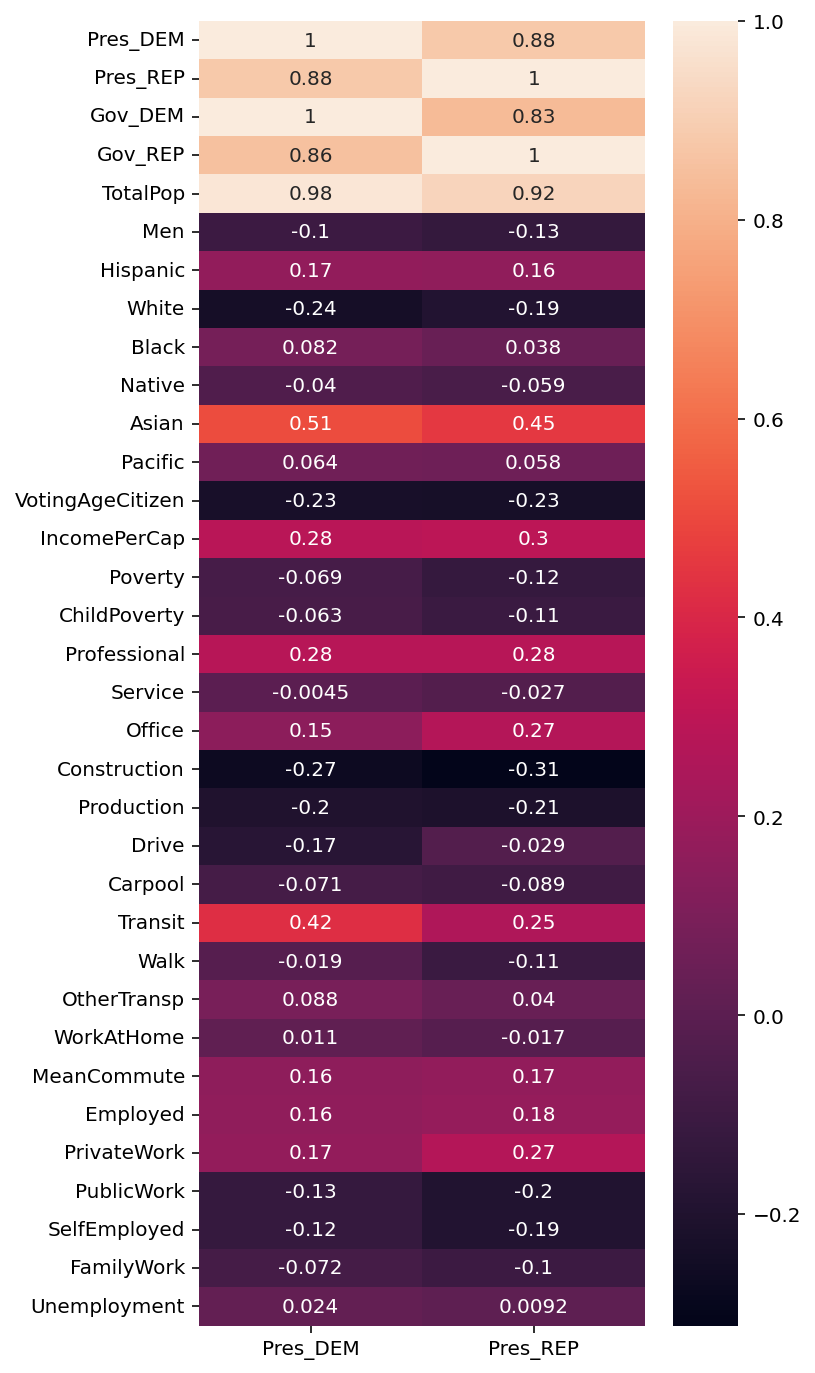

In [97]:
fig = plt.figure(figsize=(5, 12))
sns.heatmap(df.corr()[['Pres_DEM', 'Pres_REP']], annot=True)
plt.show()

$\begin{aligned}
\rightarrow &\textbf{Pres_DEM과 Pres_REP의 Correlation이 높다는 것은 데이터처리가 덜 됐음을 의미} \\
            &\text{Pres_DEM과 Pres_REP를 인구수가 아닌 비율로 변환할 필요가 있음}
\end{aligned}$

In [98]:
df_norm = df.copy()

In [99]:
df_norm['Pres_DEM'] /= df['Pres_DEM'] + df['Pres_REP']
df_norm['Pres_REP'] /= df['Pres_DEM'] + df['Pres_REP']
df_norm['Gov_DEM'] /= df['Gov_DEM'] + df['Gov_REP']
df_norm['Gov_REP'] /= df['Gov_DEM'] + df['Gov_REP']

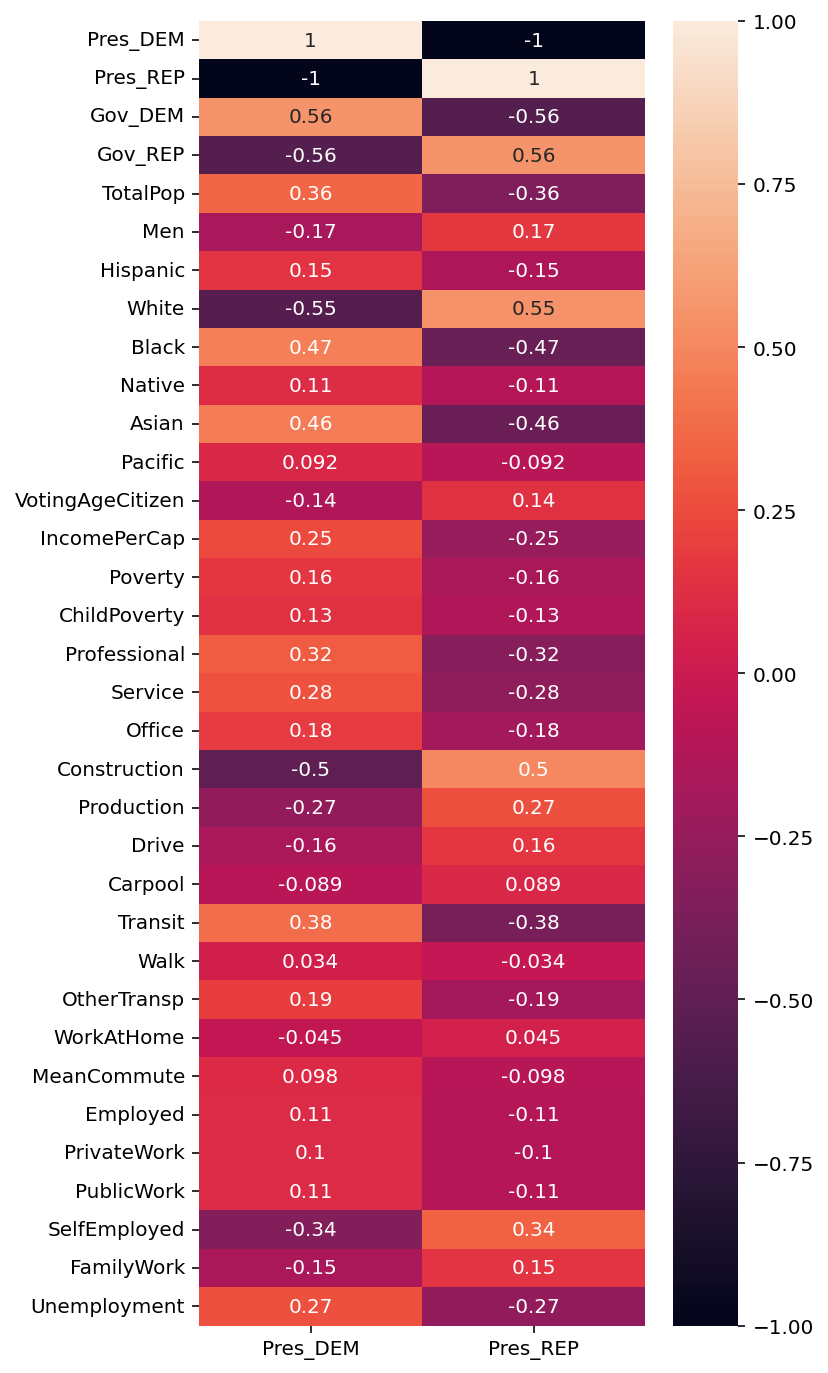

In [100]:
fig = plt.figure(figsize=(5, 12))
sns.heatmap(df_norm.corr()[['Pres_DEM', 'Pres_REP']], annot=True)
plt.show()

In [141]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import numpy as np

class SeabornFig2Grid():

    def __init__(self, seaborngrid, fig,  subplot_spec):
        self.fig = fig
        self.sg = seaborngrid
        self.subplot = subplot_spec
        if isinstance(self.sg, sns.axisgrid.FacetGrid) or \
            isinstance(self.sg, sns.axisgrid.PairGrid):
            self._movegrid()
        elif isinstance(self.sg, sns.axisgrid.JointGrid):
            self._movejointgrid()
        self._finalize()

    def _movegrid(self):
        """ Move PairGrid or Facetgrid """
        self._resize()
        n = self.sg.axes.shape[0]
        m = self.sg.axes.shape[1]
        self.subgrid = gridspec.GridSpecFromSubplotSpec(n,m, subplot_spec=self.subplot)
        for i in range(n):
            for j in range(m):
                self._moveaxes(self.sg.axes[i,j], self.subgrid[i,j])

    def _movejointgrid(self):
        """ Move Jointgrid """
        h= self.sg.ax_joint.get_position().height
        h2= self.sg.ax_marg_x.get_position().height
        r = int(np.round(h/h2))
        self._resize()
        self.subgrid = gridspec.GridSpecFromSubplotSpec(r+1,r+1, subplot_spec=self.subplot)

        self._moveaxes(self.sg.ax_joint, self.subgrid[1:, :-1])
        self._moveaxes(self.sg.ax_marg_x, self.subgrid[0, :-1])
        self._moveaxes(self.sg.ax_marg_y, self.subgrid[1:, -1])

    def _moveaxes(self, ax, gs):
        #https://stackoverflow.com/a/46906599/4124317
        ax.remove()
        ax.figure=self.fig
        self.fig.axes.append(ax)
        self.fig.add_axes(ax)
        ax._subplotspec = gs
        ax.set_position(gs.get_position(self.fig))
        ax.set_subplotspec(gs)

    def _finalize(self):
        plt.close(self.sg.fig)
        self.fig.canvas.mpl_connect("resize_event", self._resize)
        self.fig.canvas.draw()

    def _resize(self, evt=None):
        self.sg.fig.set_size_inches(self.fig.get_size_inches())

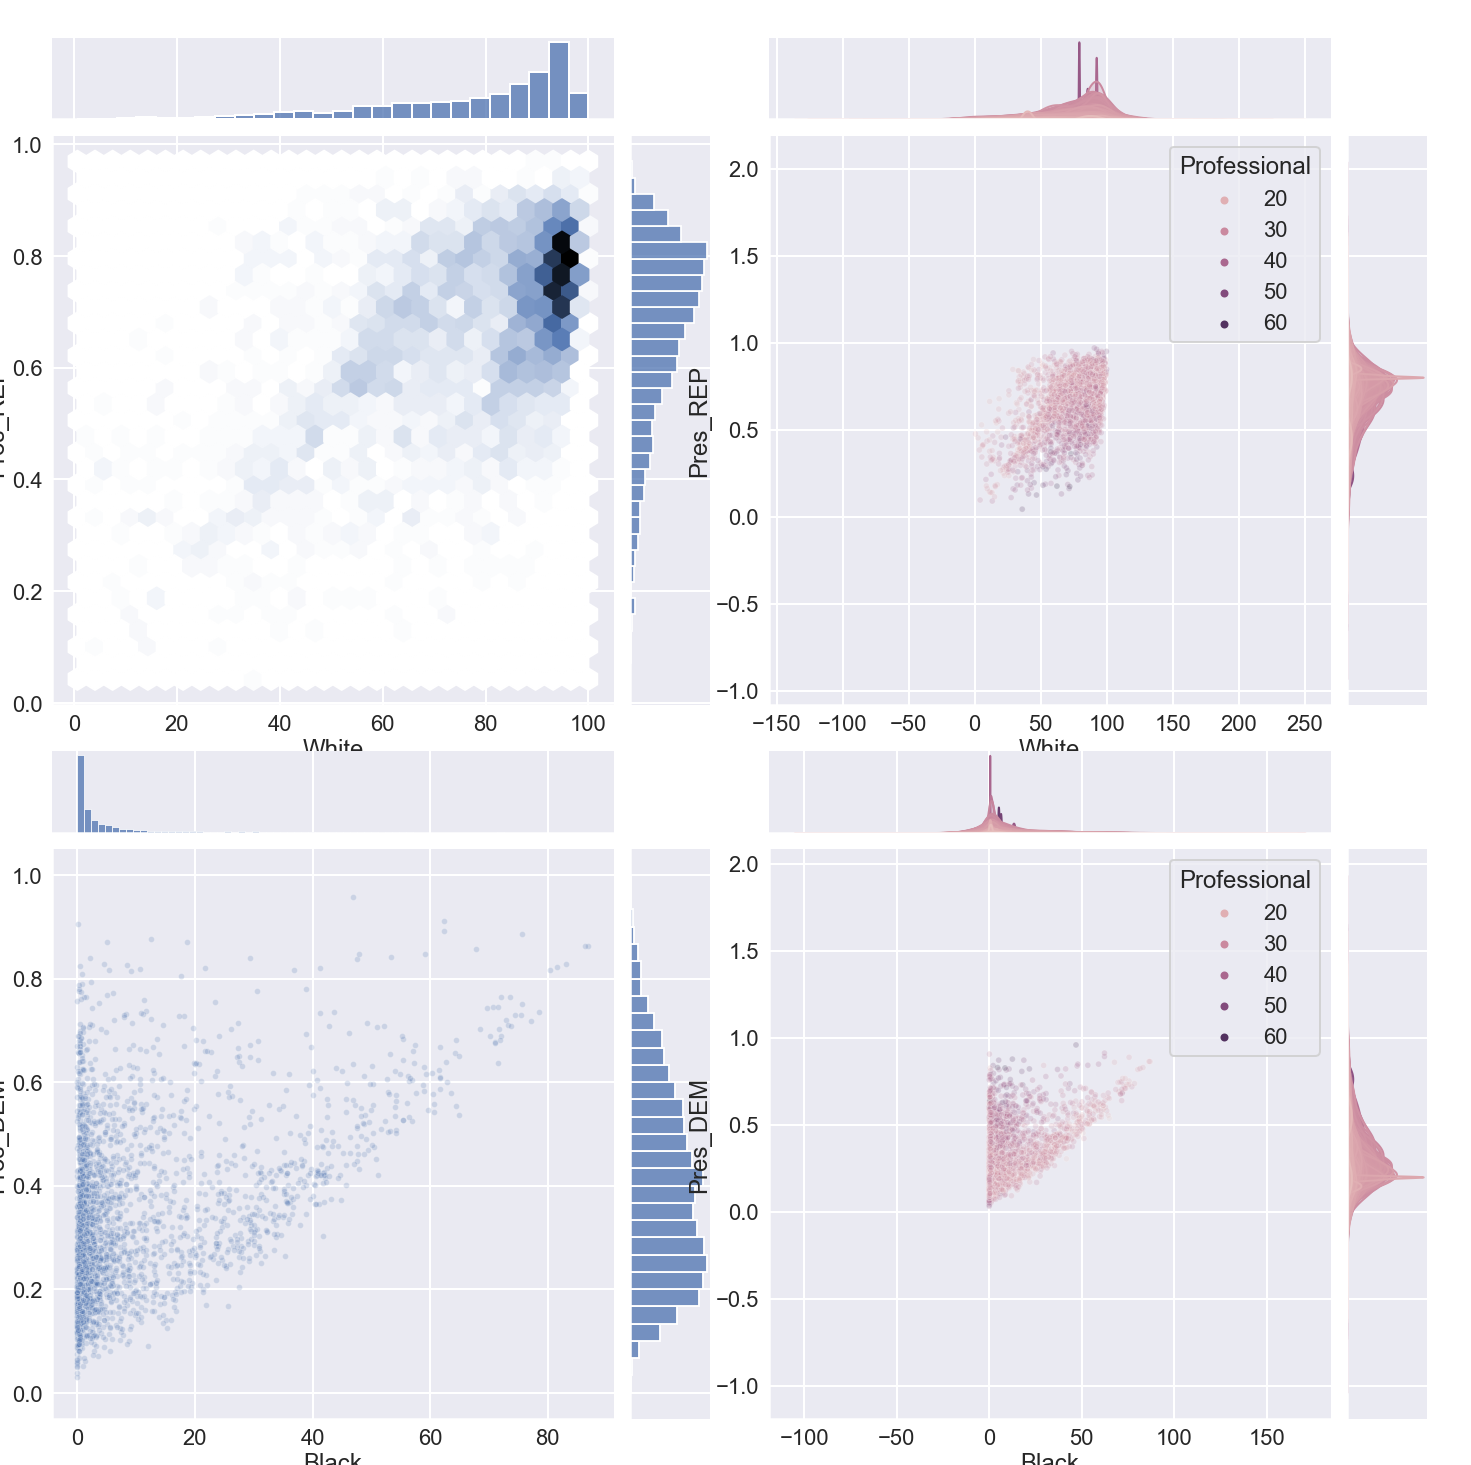

In [150]:
g0 = sns.jointplot(x='White', y='Pres_REP', data=df_norm, 
                   kind='hex',
                   #alpha=0.3,
                  )
g1 = sns.jointplot(x='White', y='Pres_REP', hue='Professional', data=df_norm, alpha=0.2)
g2 = sns.jointplot(x='Black', y='Pres_DEM', data=df_norm, 
                   #kind='hex',
                   alpha=0.2,
                  )
g3 = sns.jointplot(x='Black', y='Pres_DEM', hue='Professional', data=df_norm, alpha=0.2)

fig = plt.figure(figsize=(20, 20))
gs = gridspec.GridSpec(2, 2)
mg0 = SeabornFig2Grid(g0, fig, gs[0])
mg1 = SeabornFig2Grid(g1, fig, gs[1])
mg2 = SeabornFig2Grid(g2, fig, gs[2])
mg3 = SeabornFig2Grid(g3, fig, gs[3])

gs.tight_layout(fig)